# Importing necessary modules

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Importing spam dataset

In [71]:
spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [72]:
spam = spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [73]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Renaming columns for better understanding

In [75]:
spam = spam.rename(columns={'v1': 'output', 'v2': 'message'})

# Dimensions of dataset

In [77]:
print(f'No of rows = {spam.shape[0]}')

print(f'No of cols = {spam.shape[1]}')

No of rows = 5572
No of cols = 2


# Missing values

In [79]:
print(f'No of missing values = {spam.isnull().any().sum()}')

No of missing values = 0


# Duplicate values

In [81]:
print(f'Duplicated values = {spam.duplicated().sum()}')

Duplicated values = 403


# Removing duplicated values

In [83]:
spam = spam.drop_duplicates()
print(f'Duplicated values = {spam.duplicated().sum()}')

Duplicated values = 0


# Statistical Analysis

In [85]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   output   5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [86]:
spam['output'].unique().tolist()

['ham', 'spam']

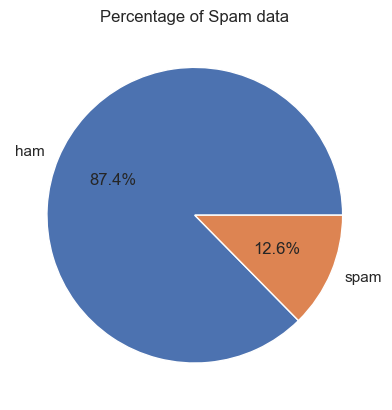

In [102]:
plt.pie(x=spam['output'].value_counts(), labels=spam['output'].unique().tolist(), autopct='%1.1f%%')

plt.title('Percentage of Spam data')
plt.show()

# Converting categorical data type output (dependent variable) to numerical data
- 0 = not spam
- 1 = spam


In [116]:
spam.output.unique()

array(['ham', 'spam'], dtype=object)

In [118]:
spam['output'] = spam['output'].apply(lambda x : 0 if x == 'ham' else 1)

In [120]:
spam

,output,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Text cleaning approach

In [123]:
from tqdm import tqdm
import contractions

from nltk.stem import WordNetLemmatizer
import nltk

import re

In [125]:
wordnet = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vamsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [127]:
def clean_message(message):
    # remove contractions like [['ne’er': 'never']], [['o’': 'of']],[['I’m': 'I am']], [["I'm'o": 'I am going to']]
    message = contractions.fix(message)
    
    # removing digits from message
    message = re.sub('[^a-zA-Z\s]+', '', message.strip())
    
    words = message.split()
    words2 = [wordnet.lemmatize(word) for word in words if word.lower() not in stopwords]

    cleaned = ' '.join(words2).lower()
    return cleaned
    

In [129]:
spam['cleaned_msg'] = spam['message'].apply(lambda x:clean_message(x))

# Converting text to Vectors using TF-IDF

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [134]:
tf_idf = TfidfVectorizer()
tf_idf.fit(spam['cleaned_msg'])

TfidfVectorizer()

In [146]:
final_tf_idf = tf_idf.transform(spam['cleaned_msg']).toarray()
final_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
final_tf_idf.shape

(5169, 7947)

In [151]:
pd.DataFrame(final_tf_idf).head()

,0,1,2,3,4,5,6,7,8,9,...,7937,7938,7939,7940,7941,7942,7943,7944,7945,7946
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
y = spam['output']
x = final_tf_idf

# Splitting train and test data

In [160]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

In [162]:
print(f'x train dimensions = {x_train.shape}')
print(f'x test dimensions  = {x_test.shape}')
print(f'y train dimensions = {y_train.shape}')
print(f'y test dimensions  = {y_test.shape}')

x train dimensions = (3618, 7947)
x test dimensions  = (1551, 7947)
y train dimensions = (3618,)
y test dimensions  = (1551,)


# Importing model XGB Classifier

In [172]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()

In [174]:
xgboost.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [182]:
y_pred_train = xgboost.predict(x_train)

y_pred_test = xgboost.predict(x_test)
y_pred_test

array([1, 0, 0, ..., 1, 0, 0])

In [194]:
from sklearn.metrics import accuracy_score, classification_report

print(f'train accuracy : {accuracy_score(y_train, y_pred_train)}')

print(f'test accuracy : {accuracy_score(y_test, y_pred_test)}')

train accuracy : 0.9875621890547264
test accuracy : 0.961960025789813


In [196]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3161
           1       1.00      0.90      0.95       457

    accuracy                           0.99      3618
   macro avg       0.99      0.95      0.97      3618
weighted avg       0.99      0.99      0.99      3618



In [198]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1355
           1       0.88      0.81      0.84       196

    accuracy                           0.96      1551
   macro avg       0.93      0.90      0.91      1551
weighted avg       0.96      0.96      0.96      1551

